In [23]:
# The code was removed by Watson Studio for sharing.

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [24]:
import numpy as np
import seaborn as sns

In [25]:
import matplotlib.pyplot as plt

In [26]:
df_data_1=df_data_1.dropna()
df_data_1=df_data_1.fillna(df_data_1.mean())


In [27]:
x=df_data_1.iloc[:,[0,1,2,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]].values
y=df_data_1.iloc[:,3].values

In [28]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_x=LabelEncoder()

In [29]:
x[:,0]=labelencoder_x.fit_transform(x[:,0])
x[:,2]=labelencoder_x.fit_transform(x[:,2])
onehotencoder=OneHotEncoder(categorical_features=[0,2])

x=onehotencoder.fit_transform(x).toarray()

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=77)

In [31]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

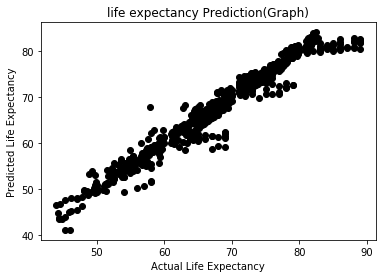

In [32]:
plt.scatter(y_test,y_pred ,color='black')
plt.title('life expectancy Prediction(Graph)')
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.show()

In [33]:
print('\naccuracy:{}%'.format(lr.score(x_test, y_test)*100))


accuracy:95.29934291265134%


In [34]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

In [35]:
wml_credentials = {
  "apikey": "p52Vu5tkj2z0Cjw1uoMpan39NNW-fGvNmR9PpRd_Jlsu",
  "iam_apikey_description": "Auto-generated for key f476313f-5563-493c-961d-7ec61ed36352",
  "iam_apikey_name": "Service credentials-1",
  "iam_role_crn": "crn:v1:bluemix:public:iam::::serviceRole:Writer",
  "iam_serviceid_crn": "crn:v1:bluemix:public:iam-identity::a/b16ba997af424acf8de170e4adef59df::serviceid:ServiceId-babed390-9179-42f8-9d10-63dfe020d0d9",
  "instance_id": "613b05c3-e8a9-4dd6-81d3-3894c80fac41",
  "url": "https://eu-gb.ml.cloud.ibm.com"
}

In [36]:
client = WatsonMachineLearningAPIClient( wml_credentials )

In [37]:
model_props = {client.repository.ModelMetaNames.AUTHOR_NAME: "pallavi", 
               client.repository.ModelMetaNames.AUTHOR_EMAIL: "SI05202000464@smartinternz.com", 
               client.repository.ModelMetaNames.NAME: "Life_Prediction"}

In [38]:
model_artifact =client.repository.store_model(lr, meta_props=model_props)

In [39]:
model_artifact

{'metadata': {'guid': 'd8fdb323-597e-4bf8-8430-272112895284',
  'url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/613b05c3-e8a9-4dd6-81d3-3894c80fac41/published_models/d8fdb323-597e-4bf8-8430-272112895284',
  'created_at': '2020-06-10T14:48:27.389Z',
  'modified_at': '2020-06-10T14:48:27.444Z'},
 'entity': {'runtime_environment': 'python-3.6',
  'learning_configuration_url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/613b05c3-e8a9-4dd6-81d3-3894c80fac41/published_models/d8fdb323-597e-4bf8-8430-272112895284/learning_configuration',
  'author': {'name': 'pallavi'},
  'name': 'Life_Prediction',
  'learning_iterations_url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/613b05c3-e8a9-4dd6-81d3-3894c80fac41/published_models/d8fdb323-597e-4bf8-8430-272112895284/learning_iterations',
  'feedback_url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/613b05c3-e8a9-4dd6-81d3-3894c80fac41/published_models/d8fdb323-597e-4bf8-8430-272112895284/feedback',
  'latest_version': {'url': '

In [40]:
guid = client.repository.get_model_uid(model_artifact)

In [41]:
guid

'd8fdb323-597e-4bf8-8430-272112895284'

In [42]:
deployment = client.deployments.create(guid, name="Life_Prediction")



#######################################################################################

Synchronous deployment creation for uid: 'd8fdb323-597e-4bf8-8430-272112895284' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='a2274a7a-8070-48d2-ae06-4adcea7c47e8'
------------------------------------------------------------------------------------------------




In [43]:
scoring_endpoint = client.deployments.get_scoring_url(deployment)

In [44]:
scoring_endpoint

'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/613b05c3-e8a9-4dd6-81d3-3894c80fac41/deployments/a2274a7a-8070-48d2-ae06-4adcea7c47e8/online'